In [2]:
import selenium
import pandas as pd
from selenium import webdriver
import time

In [3]:
driver=webdriver.Chrome('chromedriver.exe')
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="19431c4da53f7416af32e6cf519e1a06")>

### 1. Write a python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

 now we want to scrap data of amazon.com

In [192]:
url='https://www.amazon.in/'
driver.get(url)

In [193]:
# we want search data "Headphone" in search bar

search_key=driver.find_element_by_xpath('/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search_key.send_keys('Mobile phone')

In [194]:
search_btn=driver.find_element_by_xpath('//div[@class="nav-search-submit nav-sprite"]')
search_btn.click()

### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [154]:

for i in driver.find_elements_by_xpath('//a[@class="a-link-normal a-text-normal"]'):
    page2.append(i.get_attribute("href"))
page2

['https://www.amazon.in/s?k=Mobile+phone&page=2&qid=1629537980&ref=sr_pg_3',
 'https://www.amazon.in/s?k=Mobile+phone&qid=1629537980&ref=sr_pg_1',
 'https://www.amazon.in/s?k=Mobile+phone&page=2&qid=1629537980&ref=sr_pg_2',
 'https://www.amazon.in/s?k=Mobile+phone&page=4&qid=1629537980&ref=sr_pg_4',
 'https://www.amazon.in/s?k=Mobile+phone&page=4&qid=1629537980&ref=sr_pg_3',
 'https://www.amazon.in/s?k=Mobile+phone&qid=1629538511&ref=sr_pg_2',
 'https://www.amazon.in/s?k=Mobile+phone&qid=1629538511&ref=sr_pg_1',
 'https://www.amazon.in/s?k=Mobile+phone&page=3&qid=1629538511&ref=sr_pg_3',
 'https://www.amazon.in/s?k=Mobile+phone&page=3&qid=1629538511&ref=sr_pg_2',
 'https://www.amazon.in/Panasonic-Storage-Finger-4000mAh-Battery/dp/B08BV2T63X/ref=sr_1_1?dchild=1&keywords=Mobile+phone&qid=1629539114&refinements=p_n_feature_eight_browse-bin%3A8561113031&rnid=8561111031&s=electronics&sr=1-1',
 'https://www.amazon.in/KALL-K260-Smartphone-Green-16GB/dp/B09CTQ1JSQ/ref=sr_1_2?dchild=1&keywords=

In [155]:
len(page2)

57

In [246]:
# scrap Brand Name
Brand2=[]
Name_product2=[]
rating2=[]
no_of_ratings2=[]
price2=[]
Return2=[]
delivery2=[]
Availability2=[]
Other_Details2=[]
for i in page2:
    driver.get(i)
    #fetching brand
    try:
        Name_product=driver.find_element_by_xpath('//h1[@class="a-size-large a-spacing-none"]')
        Name_product2.append(Name_product.text.replace("\n","newline"))
    except:
        Name_product2.append("-")
    #fetching rating
    try:
        rating=driver.find_element_by_xpath('//span[@class="a-size-medium a-color-base"]')
        rating2.append(rating.text.replace("\n","newline"))
    except:
        rating2.append("-")
     #fetching no_of_ratings2
    try:
        no_of_ratings=driver.find_element_by_xpath('//span[@class="a-size-base"]')
        no_of_ratings2.append(no_of_ratings.text.replace("\n","newline"))
    except:
        no_of_ratings2.append("-")
     #fetching price2
    try:
        price=driver.find_element_by_xpath('//span[@class="a-size-medium a-color-price priceBlockBuyingPriceString"]')
        price2.append(price.text.replace("\n","newline"))
    except:
        price2.append("-")
      #fetching delivery2
    try:
        delivery=driver.find_element_by_xpath('//div[@class="a-section a-spacing-mini"]]')
        delivery2.append(delivery.text.replace("\n","newline"))
    except:
        delivery2.append("-")
     #fetching Return/Exchange2
    try:
        Return=driver.find_element_by_xpath('//span[@class="a-color-price"]')
        Return2.append(Return.text.replace("\n","newline"))
    except:
        Return2.append("-")
     #fetching Availability2
    try:
        Availability=driver.find_element_by_xpath('//span[@class="a-size-medium a-color-success"]')
        Availability2.append(Availability.text.replace("\n","newline"))
    except:
        Availability2.append("-")
    #fetching Brand2
    try:
        Brand=driver.find_element_by_xpath('//td[@class="a-span9"]')
        Brand2.append(Brand.text.replace("\n","newline"))
    except:
        Brand2.append("-") 
     #fetching Other_Details2
    try:
        Other_Details=driver.find_element_by_xpath('//ul[@class="a-unordered-list a-vertical a-spacing-mini"]')
        Other_Details2.append(Other_Details.text.replace("\n","newline"))
    except:
        Other_Details2.append("-") 

In [247]:
Name_product2

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Panasonic Eluga i7 (2GB RAM, 16GB Storage, Finger Print Sensor, 4000mAh Battery) (Black)',
 'I KALL K260 4G Smartphone (Green, 2GB, 16GB)',
 'I KALL K8 4G Smartphone (5.5 Inch, 16GB, Green)',
 'Panasonic Eluga I6 (Black, 2GB Ram, 16GB Storage) - 3 Month No Cost EMI',
 'I KALL K201 Dual Sim Android Smartphone with 4G Volte (6.26 Inch Waterdrop Display, 2GB Ram, 16GB Storage) (Greeb)',
 'I KALL K5 4G Smartphone (2GB, 16GB) (Blue)',
 'I KALL K200 Smartphone (5.5 Inch, 2GB, 16GB) (Red)',
 'I KALL K200 Smartphone (5.5 Inch, 2GB, 16GB) (Blue)',
 'I KALL K201 Dual Sim Android Smartphone with 4G Volte (6.26 Inch Waterdrop Display, 2GB Ram, 16GB Storage) (Greeb)',
 'I KALL K200 Smartphone Dual Sim Android 4G Mobile (5.5 Inch Display, 2GB Ram, 16GB Storage) (Blue)',
 'I KALL K5 4G Smartphone (5.5 Inch, 2GB Ram, 16GB Storage)',
 'IKALL K210 5.5 Inch, 2GB, 16GB, 4G Volte Smartphone (Rose Gold)',
 'I KALL K5 4G Smartphone Android Mobile (Blue,

In [248]:
len(Name_product2)

57

In [249]:
 rating2

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '3.1 out of 5',
 '-',
 '-',
 '3.4 out of 5',
 '-',
 '-',
 '1 out of 5',
 '1 out of 5',
 '-',
 '-',
 '-',
 '1 out of 5',
 '-',
 '-',
 '-',
 '3.3 out of 5',
 '-',
 '1 out of 5',
 '-',
 '-',
 '-',
 '2 out of 5',
 '3.2 out of 5',
 '-',
 '4.1 out of 5',
 '4.3 out of 5',
 '4.3 out of 5',
 '4.2 out of 5',
 '4.3 out of 5',
 '4.4 out of 5',
 '4.3 out of 5',
 '4.3 out of 5',
 '4.2 out of 5',
 '4.1 out of 5',
 '4.1 out of 5',
 '4.3 out of 5',
 '3.1 out of 5',
 '4.2 out of 5',
 '4.2 out of 5',
 '4.2 out of 5',
 '4.1 out of 5',
 '2.6 out of 5',
 '3.8 out of 5',
 '4.2 out of 5',
 '-',
 '-',
 '-',
 '3.9 out of 5']

In [250]:
 len(rating2)

57

In [251]:
no_of_ratings2

['39',
 '234,332',
 '39',
 '1,061',
 '1,061',
 '234,332',
 '234,332',
 '1,238',
 '1,238',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [252]:
len(no_of_ratings2)

57

In [253]:
price2

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '₹5,798.00',
 '₹4,699.00',
 '₹4,399.00',
 '₹5,498.00',
 '₹4,999.00',
 '₹4,199.00',
 '₹4,299.00',
 '₹4,299.00',
 '₹4,999.00',
 '₹4,399.00',
 '₹4,399.00',
 '₹4,399.00',
 '₹4,399.00',
 '₹5,999.00',
 '₹4,699.00',
 '₹7,299.00',
 '₹4,999.00',
 '-',
 '₹4,999.00',
 '₹4,399.00',
 '₹4,699.00',
 '₹4,999.00',
 '₹6,100.00',
 '₹4,399.00',
 '₹10,499.00',
 '-',
 '-',
 '₹6,999.00',
 '₹14,999.00',
 '₹16,790.00',
 '₹19,990.00',
 '-',
 '₹12,490.00',
 '₹10,499.00',
 '-',
 '₹11,999.00',
 '₹5,798.00',
 '-',
 '₹17,990.00',
 '₹6,999.00',
 '-',
 '₹8,321.00',
 '-',
 '₹10,999.00',
 '₹5,999.00',
 '₹4,199.00',
 '₹5,999.00',
 '₹39,999.00']

In [254]:
len(price2)

57

In [255]:
Return2

['-',
 '-',
 '₹5,299',
 '₹6,999',
 '₹6,999',
 '-',
 '-',
 '-',
 '-',
 'Up to    5,500.00 off',
 'Up to    4,450.00 off',
 '-',
 'Up to    5,200.00 off',
 '-',
 '-',
 'Up to    4,050.00 off',
 'Up to    4,050.00 off',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Up to    5,650.00 off',
 'Up to    4,450.00 off',
 'Up to    6,900.00 off',
 '-',
 '-',
 '-',
 '-',
 'Up to    4,450.00 off',
 'Up to    4,700.00 off',
 '₹399.00',
 '-',
 'Up to    9,900.00 off',
 'Up to    14,150.00 off',
 'Up to    14,150.00 off',
 'Up to    6,600.00 off',
 'Up to    14,150.00 off',
 'Up to    14,450.00 off',
 '₹799.00',
 '-',
 'Up to    11,500.00 off',
 'Up to    9,900.00 off',
 'Up to    6,600.00 off',
 'Up to    11,350.00 off',
 'Up to    5,500.00 off',
 'Up to    11,500.00 off',
 'Up to    14,450.00 off',
 'Up to    6,600.00 off',
 'Up to    6,600.00 off',
 'Up to    7,900.00 off',
 'Up to    5,200.00 off',
 'Up to    10,350.00 off',
 '-',
 '-',
 'Up to    5,650.00 off',
 'Up to    17,450.00 off']

In [256]:
len(Return2)

57

In [257]:
Brand2

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Panasonic',
 'Green',
 'K8',
 'Panasonic',
 'Green',
 'K5',
 'K200',
 'K200',
 'Green',
 'Blue',
 'K5',
 'K210',
 'K5',
 'Z10',
 'Purple',
 'Nokia C3',
 'Blue',
 '5S',
 'Blue',
 'Red',
 'Blue',
 'K800',
 'Titanium s9 plus',
 'Gold',
 'Galaxy M02s',
 'Galaxy M31',
 'Galaxy M31',
 'Redmi 9A (2GB+32GB)',
 'Galaxy M31',
 'Redmi',
 'POCO F1',
 'V17 Pro',
 'CPH2015',
 'Galaxy M02s',
 'Realme C11',
 'Redmi',
 'Panasonic',
 'Samsung M21, 2021 Edition',
 'A74 Fantastic Purple',
 'Redmi 9A (2GB+32GB)',
 'Realme C11',
 '2021',
 'L5505',
 'Redmi 9 Power',
 'Blue',
 'K5',
 'Z10',
 'Mi 11X Pro']

In [258]:
delivery2

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-']

In [259]:
 Availability2

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 2 left in stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 2 left in stock.',
 'In stock.',
 'Only 2 left in stock.',
 'Only 2 left in stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 1 left in stock.',
 '',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 '-',
 '-',
 'In stock.',
 '-',
 'In stock.',
 'Only 1 left in stock.',
 '-',
 'In stock.',
 'In stock.',
 '-',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.']

In [260]:
Other_Details2

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '8 MP Primary Camera with LED Flash | 8\u2009MP Front Camera with LED Flashnewline5.46 inches (13.89cm) | HD+, 1440 x 720 Pixel | IPS Display | Rear Finger print sensornewline2GB RAM | 16GB internal memory expandable up to 256GB | Dual SIM (Nano+Micro)newlineAndroid Pie v9.0 Operating System with Quad-core 1.5Ghz MediaTek Prcocessor | 4000mAh Battery | OTG CompatiblenewlineMain Device (All-Inclusive Battery), Charger, Cable, Protective Screen Guard, Protective Case, SIM tooling pin, earphone, Quick Start Guide, Warranty card',
 '8MP Rear Camera | 5MP Front Camera | Made in Indianewline15.9 cm (6.26 inch) Display | multi-touch capacitive touch screen with 540x1140 pixel resolutionnewline2GB ram, 16GB storage | Expandable Memory 64GB | Dual Sim (4G+2G) | 4G VoltenewlineAndroid 6.0 marshmallow with 1.3 Ghz Quad Corenewline1 Year warranty for device and 6 Months for box accessories',
 '5MP Rear Camera | 2MP Front Camera | Made in India

In [261]:
len(Brand2),len(Name_product2),len(rating2),len(no_of_ratings2),len(Return2),len(price2),len(Availability2),len(delivery2),len(Other_Details2),len(page2)

(57, 57, 57, 57, 57, 57, 57, 57, 57, 57)

In [262]:
# now make dataframe for above scraped data
amazon=pd.DataFrame({})
amazon['Brand Name']=Brand2
amazon['Product']=Name_product2
amazon['Ratings']=rating2
amazon['No of Ratings']=no_of_ratings2
amazon['Return/Exchange']=Return2
amazon['Price']=price2
amazon['Availability']= Availability2
amazon['Expected Delivey']=delivery2
amazon['Other Details']=Other_Details2
amazon['Product URL']=page2
amazon

,Brand Name,Product,Ratings,No of Ratings,Return/Exchange,Price,Availability,Expected Delivey,Other Details,Product URL
0,-,-,-,39,-,-,-,-,-,https://www.amazon.in/s?k=Mobile+phone&page=2&...
1,-,-,-,"234,332",-,-,-,-,-,https://www.amazon.in/s?k=Mobile+phone&qid=162...
2,-,-,-,39,"₹5,299",-,-,-,-,https://www.amazon.in/s?k=Mobile+phone&page=2&...
3,-,-,-,"1,061","₹6,999",-,-,-,-,https://www.amazon.in/s?k=Mobile+phone&page=4&...
4,-,-,-,"1,061","₹6,999",-,-,-,-,https://www.amazon.in/s?k=Mobile+phone&page=4&...
5,-,-,-,"234,332",-,-,-,-,-,https://www.amazon.in/s?k=Mobile+phone&qid=162...
6,-,-,-,"234,332",-,-,-,-,-,https://www.amazon.in/s?k=Mobile+phone&qid=162...
7,-,-,-,"1,238",-,-,-,-,-,https://www.amazon.in/s?k=Mobile+phone&page=3&...
8,-,-,-,"1,238",-,-,-,-,-,https://www.amazon.in/s?k=Mobile+phone&page=3&...
9,Panasonic,"Panasonic Eluga i7 (2GB RAM, 16GB Storage, Fin...",3.1 out of 5,,"Up to 5,500.00 off","₹5,798.00",In stock.,-,8 MP Primary Camera with LED Flash | 8 MP Fron...,https://www.amazon.in/Panasonic-Storage-Finger...


### 3. Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [105]:
url3='https://www.google.com/'
driver.get(url3)

In [106]:
# we want search data "fruit" in search bar

search_key=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_key.send_keys('Fruit')

In [107]:
search_btn=driver.find_element_by_xpath('//input[@class="gNO89b"]')
search_btn.click()

In [108]:
search_image=driver.find_element_by_xpath('/html/body/div[7]/div/div[3]/div/div[1]/div/div[1]/div/div[2]/a')
search_image.click()

In [109]:
search_mango=driver.find_element_by_xpath('/html/body/div[2]/c-wiz/div[2]/div[2]/c-wiz[2]/scrolling-carousel/div[1]/span/span/div[2]/a/span')
search_mango.click()

In [53]:
url=driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')
url

[<selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="c3ef0b46-f098-403c-b32b-f53ee1d9e517")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="82660e2d-6df0-4473-bab8-7f2d3bcf6026")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="ced9a5df-c8be-48fd-90df-0ed4d0353d21")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="bb5705f3-2367-4690-8e7f-19611566bffb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="85f1844a-a665-4525-b7d1-a3b27524ed42")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="76f91ab5-ca68-4078-b1a4-43cd316ec40c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="1f5f7652-c73d-4f3c-8a50-4c

In [55]:
len(url)

212

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR06D9yhNv6ufAobipL0aESrTL9lE_lts8bPA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0ODqV7K2T5dRAmt0luoCV4P1jogdxWqMIxw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTOK9LowlMIAZa0RNbjHNlO7N74MuAmT2JyDw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuMYKHJzeAps-9YdZFKuDdtHtBPHSK6lXdXQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQP5Td-UURaUSjsyx4eO7MKL78td5gKEdO4Dw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBdd8-MJYIddpzmS-wApekUqisc64EXl-okQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDnFYUAwfvrsnGpLqO7B6B1H0CaxPGhCLStg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9ggpu44kr9Fg9YJbKYo3i8l502rOExMEndw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9F9HbBS6-5D
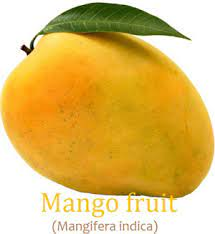
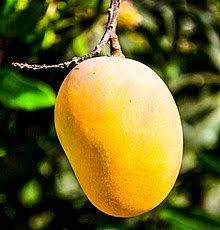
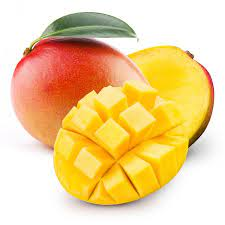
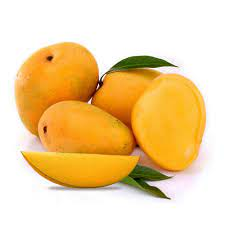
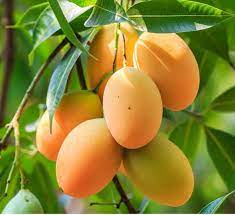
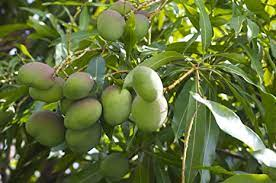
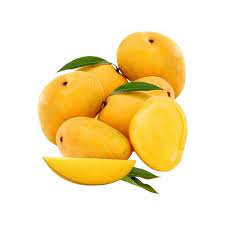
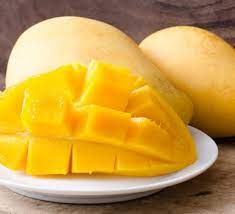
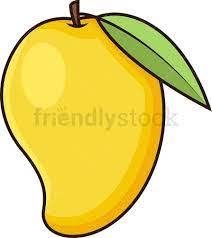
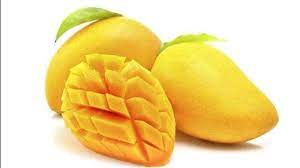
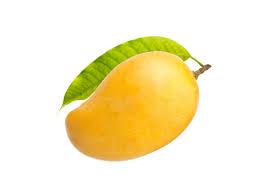
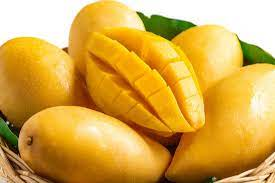
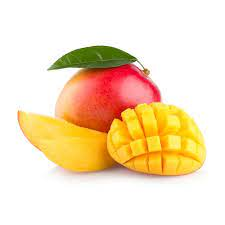
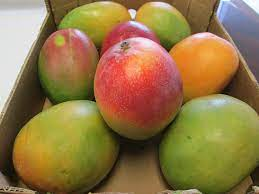
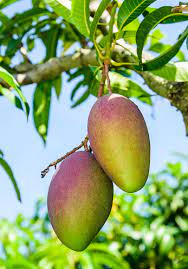
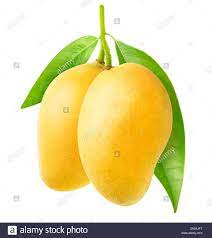
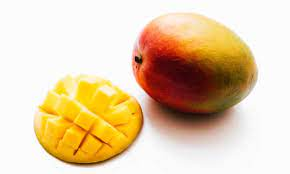
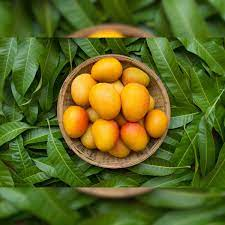
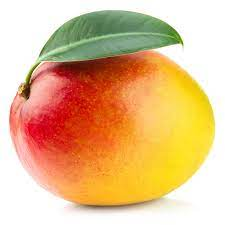
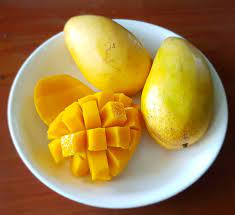

In [56]:
mango_image=[]
for i in url[:100]:
    mango_image.append(i.get_attribute('src'))
mango_image

In [57]:
len(mango_image)

100

In [70]:
google_button=driver.find_element_by_xpath('/html/body/c-wiz/div/header/div[2]/div/div[1]/form/div[1]/div[1]/c-wiz/c-wiz/div/a/img')
google_button.click()

In [72]:
search_key=driver.find_element_by_xpath('/html/body/div[4]/div[2]/form/div[1]/div[1]/div[2]/div/div[2]/input')
search_key.send_keys('cars')

In [75]:
search_btn=driver.find_element_by_xpath('/html/body/div[4]/div[2]/form/div[1]/div[1]/div[2]/button/div/span')
search_btn.click()

In [76]:
image_btn=driver.find_element_by_xpath('/html/body/div[7]/div/div[3]/div/div[1]/div/div[1]/div/div[2]/a')
image_btn.click()

In [92]:
url1=driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')
url1

[<selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="f12a746d-313a-4bc6-b64b-b133948f1c05")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="b701095d-74cc-430f-9337-7dd7de8f7598")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="ed8041db-122b-4fbe-8044-5aab729a5063")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="60a896d1-7740-426b-a45f-658b8fed8802")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="373c36f2-ee06-4aaf-b983-5f50b40b7153")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="976ba72d-a6bd-4769-8c78-9ee64eefce58")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a09e80f66e60fd49e2dddcd6224072de", element="b3b1d6e9-905c-4a6f-975b-7d

In [93]:
len(url1)

400

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS9tNWA9jrkFikCj-_MtuDBIesg2APINoXApg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSL_hpK-TeMUY2YYvlgZpJluh3c61--S4HLqA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSmgeL7BgjbWE-UN17vw4WXjZz9noZgLfBRBw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-_wX2kxYjnUEr5P-qk6c1oJN_nxYHKY1Skw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTL8es92nEfJZrPYTja1BR9UumhnPnF3ObsWQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUHenL8btshmEydhjLmItWr_n87bBkvBdrsA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-uYejFotNfDuVZjKUMDL5NL3PPZJbmfcr5g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWGvBIMKjRqiKRVEeGP4SU5-ODjSYCNNzXBw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXYx6Yw26_Ne
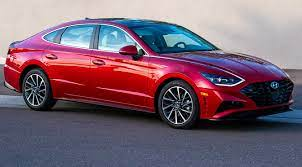
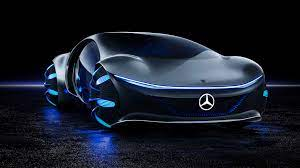
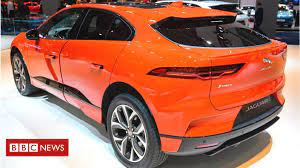
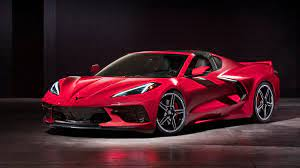
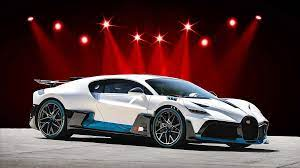
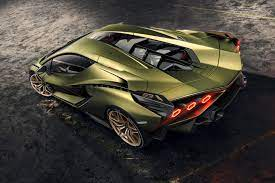
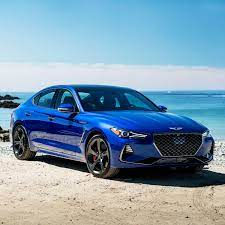
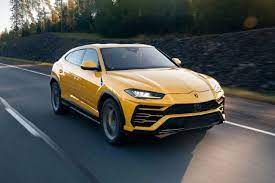
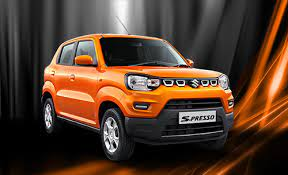
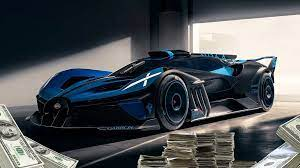
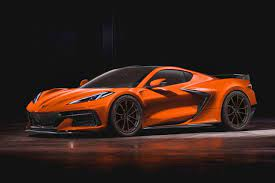
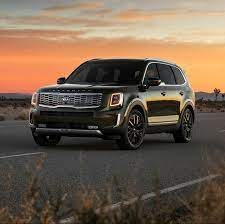
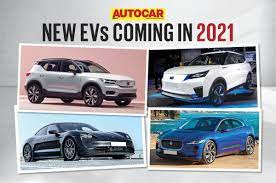
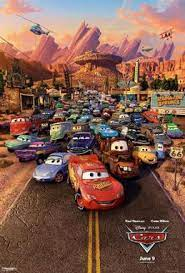
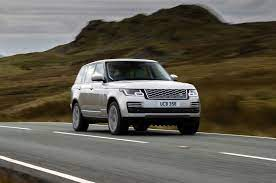
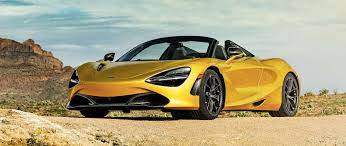
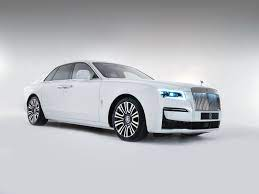
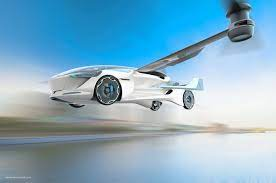
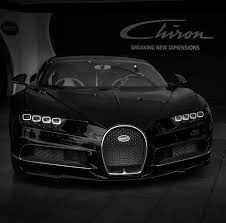
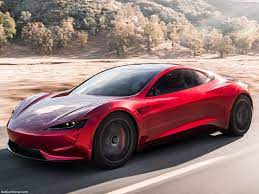

In [94]:
car_image=[]
for i in url1[:100]:
    car_image.append(i.get_attribute('src'))
car_image

In [95]:
len(car_image)

100

In [19]:
search_key=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_key.send_keys('‘Machine Learning')

In [20]:
search_btn=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[2]/center/input[1]')
search_btn.click()

In [25]:
image_btn=driver.find_element_by_xpath('/html/body/div[7]/div/div[3]/div/div[1]/div/div[1]/div/div[3]/a')
image_btn.click()

In [26]:
url3=driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')
url3

[<selenium.webdriver.remote.webelement.WebElement (session="24233ba1cafcaf2e34e67d5027b4321d", element="7ebb49a3-920c-4f35-a5fc-eabdf915d504")>,
 <selenium.webdriver.remote.webelement.WebElement (session="24233ba1cafcaf2e34e67d5027b4321d", element="366e1a2e-120b-489e-bd7d-3bbfa3128ff9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="24233ba1cafcaf2e34e67d5027b4321d", element="a7361cc4-d290-4161-80de-30f0e0904225")>,
 <selenium.webdriver.remote.webelement.WebElement (session="24233ba1cafcaf2e34e67d5027b4321d", element="f481c358-6250-4f54-87da-88845abf0808")>,
 <selenium.webdriver.remote.webelement.WebElement (session="24233ba1cafcaf2e34e67d5027b4321d", element="783facf8-6a16-49ea-95ff-6c044eaca1a9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="24233ba1cafcaf2e34e67d5027b4321d", element="05271f62-cb4a-4f3f-8542-b42f2a23f885")>,
 <selenium.webdriver.remote.webelement.WebElement (session="24233ba1cafcaf2e34e67d5027b4321d", element="9de9014e-c7e3-4cec-82a2-23

In [29]:
len(url3)

200

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfN12oiCbkM3yQNEyPU1BU2oWCHh3gEGKNcA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT5sN83LcL1q_Gs6wTuepkBYdRe5QcVDosaXw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6Gm6dcpTPDxUDHgCoMaH3995wU39adf_dFQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpOS6K8MU7vUTwsr3qJOaA65r88DKNoQ35HA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThKWzCEIz4Qlh_hyRMcifUF8AUU-dK_N7iRg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyk-rAWff8es4lJvIa_J3mIuveLfNztGCpLg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWwQAsLQGePm2peRX-jSUlmXt48OT8arllUQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBSnQdgRaQQDDwd039ul9wyaqgymUcRyIosQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQh4HzGIRo74W
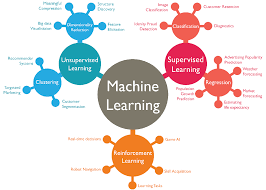
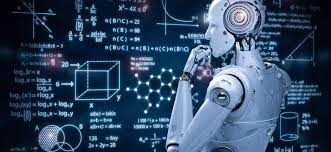
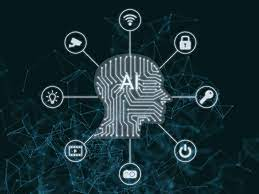
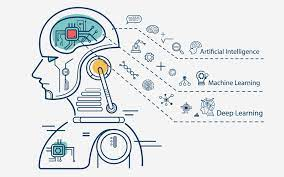
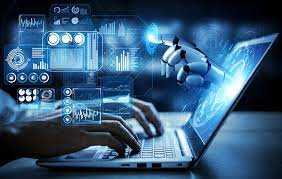
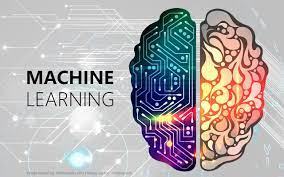
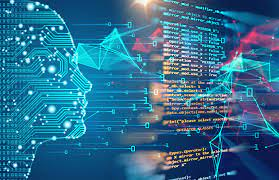
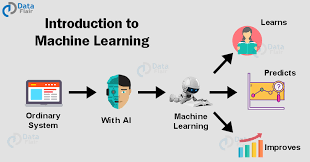
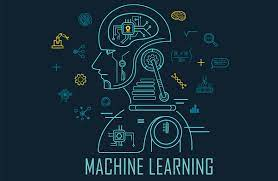
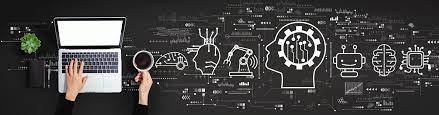
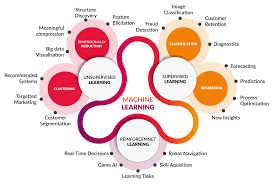
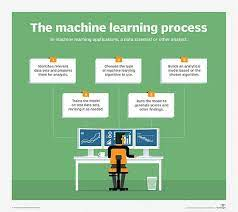
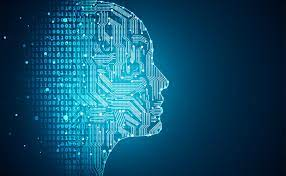
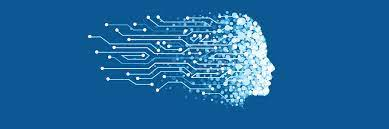
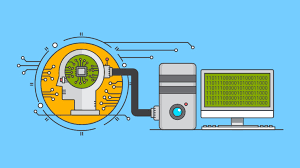
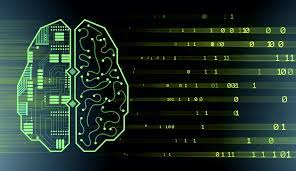
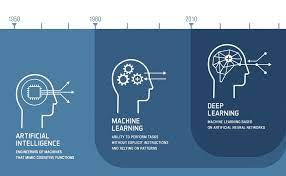
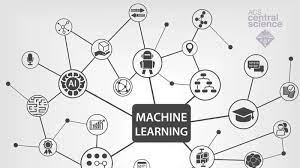
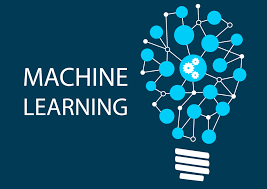
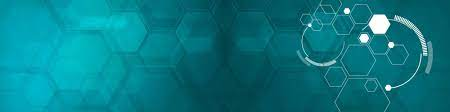

In [28]:
Machine_learning_image=[]
for i in url3[:100]:
    Machine_learning_image.append(i.get_attribute('src'))
Machine_learning_image

In [30]:
len(Machine_learning_image)

100

#### Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [156]:
url3='https://www.flipkart.com/'
driver.get(url3)

In [157]:
search_bar4=driver.find_element_by_xpath('//input[@class="_3704LK"]')
search_bar4.send_keys('Motorola')

In [158]:
search_btn4=driver.find_element_by_xpath('//button[@class="L0Z3Pu"]')
search_btn4.click()

In [159]:
# fetching urls first
url4_1=[]
for i in driver.find_elements_by_xpath("//a[@class='_1fQZEK']"):
    url4_1.append(i.get_attribute('href'))
url4_1

['https://www.flipkart.com/motorola-g10-power-aurora-grey-64-gb/p/itm34b1df7be8de4?pid=MOBFVXJ47NGGDKKX&lid=LSTMOBFVXJ47NGGDKKXZDO4ES&marketplace=FLIPKART&q=Motorola&store=search.flipkart.com&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=394adf36-8c9a-4fdf-a946-c4131ce28a8b.MOBFVXJ47NGGDKKX.SEARCH&ppt=hp&ppn=homepage&ssid=dljnug5sqo0000001629739376779&qH=2ed1afe3c9215523',
 'https://www.flipkart.com/motorola-g60-frosted-champagne-128-gb/p/itm9154ecfab780b?pid=MOBFWSF8KAWGYV9A&lid=LSTMOBFWSF8KAWGYV9ABTQCZJ&marketplace=FLIPKART&q=Motorola&store=search.flipkart.com&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=394adf36-8c9a-4fdf-a946-c4131ce28a8b.MOBFWSF8KAWGYV9A.SEARCH&ppt=hp&ppn=homepage&ssid=dljnug5sqo0000001629739376779&qH=2ed1afe3c9215523',
 'https://www.flipkart.com/motorola-g60-dynamic-gray-128-gb/p/itmf1d5d2978289e?pid=MOBFWSF8U37QFQGK&lid=LSTMOBFWSF8U37QFQGKG9BJEQ&marketplace=FLIPKART&q=Motorola&store=search.flipkart.com&spotlightTagId=BestsellerId_search.

In [160]:
len(url4_1)

40

In [185]:
Brand_name=[]
color=[]
RAM=[]
ROM=[]
Primary_camera=[]
Secondary_camera=[]
Display_size=[]
Display_resolution=[]
Processor=[]
Processor_cores=[]
Battery_capacity=[]
price=[]
for i in url4_1:
    driver.get(i)
    # fetch Brand_name
    try:
        Brand_name1=driver.find_element_by_xpath("//span[@class='B_NuCI']")
        Brand_name.append(Brand_name1.text.replace("\n","newline"))
    except:
        Brand_name.append('--')
   ## fetch color 
    try:
        color1=driver.find_element_by_xpath("//li[@class='rgWa7D']")
        color.append(color1.text.replace("\n","newline"))
    except:
        color.append('--')
    # fetch RAM
    try:
        RAM1=driver.find_element_by_xpath("//li[@class='_21Ahn-']")
        RAM.append( RAM1.text.replace("\n","newline"))
    except:
        RAM.append('--')
    
    # fetch ROM
    try:
        ROM1=driver.find_element_by_xpath("//li[@class='_21Ahn-']")
        ROM.append( ROM1.text.replace('\n',' '))
    except:
        ROM.append('--')
     
    # fetch Primary_camera
    try:
        Primary_camera1=driver.find_element_by_xpath("//li[@class='URwL2w col col-9-12']")
        Primary_camera.append( Primary_camera1.text.replace('\n',' '))
    except:
        Primary_camera.append('--')
    
    # fetch Secondary_camera
    try:
        Secondary_camera1=driver.find_element_by_xpath("//li[@class='_21Ahn-']")
        Secondary_camera.append( Secondary_camera1.text.replace('\n',' '))
    except:
        Secondary_camera.append('--')
    
     # fetch Display_size
    try:
        Display_size1=driver.find_element_by_xpath("//li[@class='_21lJbe']")
        Display_size.append( Display_size1.text.replace('\n',' '))
    except:
        Display_size.append('--')
    
     # fetch Display_resolution
    try:
        Display_resolution1=driver.find_element_by_xpath("//li[@class='_21lJbe']")
        Display_resolution.append( Display_resolution1.text.replace('\n',' '))
    except:
        Display_resolution.append('--')
    
     # fetch Processor
    try:
        Processor1=driver.find_element_by_xpath("//li[@class='_21lJbe']")
        Processor.append(Processor1.text.replace('\n',' '))
    except:
        Processor.append('--')
    
    # fetch Processor_cores
    try:
        Processor_cores1=driver.find_element_by_xpath("//ul[@class='_21lJbe']//li")
        Processor_cores.append(Processor_cores1.text.replace('\n',' '))
    except:
        Processor_cores.append('--')
    
    # fetch Battery_capacity
    try:
        Battery_capacity1=driver.find_element_by_xpath("//li[@class='_2418kt']")
        Battery_capacity.append(Battery_capacity1.text.replace('\n',' '))
    except:
        Battery_capacity.append('--')
    
      #fetch price
    try:
        price1=driver.find_element_by_xpath("//div[@class='_30jeq3 _16Jk6d']")
        price.append(price1.text.replace('\n',' '))
    except:
        price.append('--')

In [186]:
Brand_name

['MOTOROLA G10 Power (Aurora Grey, 64 GB)  (4 GB RAM)',
 'MOTOROLA G60 (Frosted Champagne, 128 GB)  (6 GB RAM)',
 'MOTOROLA G60 (Dynamic Gray, 128 GB)  (6 GB RAM)',
 'MOTOROLA G40 Fusion (Dynamic Gray, 128 GB)  (6 GB RAM)',
 'MOTOROLA G40 Fusion (Frosted Champagne, 128 GB)  (6 GB RAM)',
 'MOTOROLA E7 Power (Tahiti Blue, 64 GB)  (4 GB RAM)',
 'MOTOROLA E7 Power (Coral Red, 64 GB)  (4 GB RAM)',
 'MOTOROLA G10 Power (Breeze Blue, 64 GB)  (4 GB RAM)',
 'MOTOROLA G40 Fusion (Dynamic Gray, 64 GB)  (4 GB RAM)',
 'MOTOROLA E7 Power (Tahiti Blue, 32 GB)  (2 GB RAM)',
 'MOTOROLA G40 Fusion (Frosted Champagne, 64 GB)  (4 GB RAM)',
 'MOTOROLA G9 Power (Electric Violet, 64 GB)  (4 GB RAM)',
 'MOTOROLA USB Rapid Charger with Micro-USB Data Cable Fast charging 10 W 2 A Mobile Charger with Detachable Cable  (White, Cable Included)',
 'MOTOROLA E7 Power (Coral Red, 32 GB)  (2 GB RAM)',
 'MOTOROLA Razr 5G (Polished Graphite, 256 GB)  (8 GB RAM)',
 'MOTOROLA Razr (Black, 128 GB)  (6 GB RAM)',
 'Moto X4 (

In [187]:
color

['--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--']

In [188]:
RAM

['4 GB RAM | 64 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '2 GB RAM | 32 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 'Wall Charger',
 '2 GB RAM | 32 GB ROM | Expandable Upto 1 TB',
 '8 GB RAM | 256 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '3 GB RAM | 32 GB ROM | Expandable Upto 2 TB',
 '2 GB RAM | 16 GB ROM | Expandable Upto 128 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '2 GB RAM | 32 GB ROM',
 '2 GB RAM | 16 GB ROM | Expandable Upto 32 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '2 GB RAM | 16 GB ROM',
 'Supported Apps: Netflix|Prime Video|Disney+Hotstar|Youtube',
 'Wall Charger',
 'Supported Apps: Netflix|Prime Video|Disney+Hotstar|Youtube',
 'Supported Apps: Netflix|Prime Video|Disney+

In [189]:
ROM

['4 GB RAM | 64 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '2 GB RAM | 32 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 'Wall Charger',
 '2 GB RAM | 32 GB ROM | Expandable Upto 1 TB',
 '8 GB RAM | 256 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '3 GB RAM | 32 GB ROM | Expandable Upto 2 TB',
 '2 GB RAM | 16 GB ROM | Expandable Upto 128 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '2 GB RAM | 32 GB ROM',
 '2 GB RAM | 16 GB ROM | Expandable Upto 32 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '2 GB RAM | 16 GB ROM',
 'Supported Apps: Netflix|Prime Video|Disney+Hotstar|Youtube',
 'Wall Charger',
 'Supported Apps: Netflix|Prime Video|Disney+Hotstar|Youtube',
 'Supported Apps: Netflix|Prime Video|Disney+

In [190]:
Primary_camera

['--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--']

In [191]:
Secondary_camera

['4 GB RAM | 64 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '2 GB RAM | 32 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 'Wall Charger',
 '2 GB RAM | 32 GB ROM | Expandable Upto 1 TB',
 '8 GB RAM | 256 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '3 GB RAM | 32 GB ROM | Expandable Upto 2 TB',
 '2 GB RAM | 16 GB ROM | Expandable Upto 128 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '2 GB RAM | 32 GB ROM',
 '2 GB RAM | 16 GB ROM | Expandable Upto 32 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '2 GB RAM | 16 GB ROM',
 'Supported Apps: Netflix|Prime Video|Disney+Hotstar|Youtube',
 'Wall Charger',
 'Supported Apps: Netflix|Prime Video|Disney+Hotstar|Youtube',
 'Supported Apps: Netflix|Prime Video|Disney+

In [192]:
Display_size

['Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, SIM Tool, Protective Cover, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, Protective Cover, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, Protective Cover, Guides',
 '1',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Travel Adapter, USB Cable, Type C USB Cable, USB Type C Headset Adaptor, SIM Tool, Getting Started Guide, Legal Insert',
 'Handset, Premium 18W Charger with Fabric USB Cable, HSJ Adaptor, Premium Headset',
 'Now upgradable to

In [193]:
Display_resolution

['Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, SIM Tool, Protective Cover, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, Protective Cover, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, Protective Cover, Guides',
 '1',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Travel Adapter, USB Cable, Type C USB Cable, USB Type C Headset Adaptor, SIM Tool, Getting Started Guide, Legal Insert',
 'Handset, Premium 18W Charger with Fabric USB Cable, HSJ Adaptor, Premium Headset',
 'Now upgradable to

In [194]:
Processor

['Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, SIM Tool, Protective Cover, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, Protective Cover, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Charger, USB Cable, SIM Tool, User Guides',
 'Handset, Charger, USB Cable, SIM Tool, Protective Cover, Guides',
 '1',
 'Handset, Charger, USB Cable, User Guide, SIM Tool',
 'Handset, Travel Adapter, USB Cable, Type C USB Cable, USB Type C Headset Adaptor, SIM Tool, Getting Started Guide, Legal Insert',
 'Handset, Premium 18W Charger with Fabric USB Cable, HSJ Adaptor, Premium Headset',
 'Now upgradable to

In [195]:
Processor_cores

['--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--']

In [196]:
Battery_capacity

['--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--']

In [197]:
price

['₹9,999',
 '₹16,999',
 '₹16,999',
 '₹15,499',
 '₹15,499',
 '₹8,799',
 '₹8,799',
 '₹9,999',
 '₹14,499',
 '₹6,999',
 '₹14,499',
 '₹11,999',
 '₹599',
 '₹6,999',
 '₹89,999',
 '₹74,999',
 '₹21,999',
 '₹17,499',
 '₹7,999',
 '₹24,999',
 '₹6,900',
 '₹20,000',
 '₹12,000',
 '₹36,999',
 '₹599',
 '₹29,999',
 '₹15,999',
 '₹1,299',
 '₹6,499',
 '₹199',
 '₹8,839',
 '₹249',
 '₹7,799',
 '₹19,999',
 '₹45,999',
 '₹6,370',
 '₹4,499',
 '₹1,259',
 '₹249',
 '₹2,285']

In [198]:
# make dataframe of above scraped data
motorola=pd.DataFrame({})
motorola['Brand_name']=Brand_name
motorola['color']=color
motorola['RAM']=RAM
motorola['ROM']=ROM
motorola['Primary_camera']=Primary_camera
motorola['Secondary_camera']=Secondary_camera
motorola['Display_size']=Display_size
motorola['Display_resolution']=Display_resolution
motorola['Processor']=Processor
motorola['Processor_cores']=Processor_cores
motorola['Battery_capacity']=Battery_capacity
motorola['price']=price
motorola


,Brand_name,color,RAM,ROM,Primary_camera,Secondary_camera,Display_size,Display_resolution,Processor,Processor_cores,Battery_capacity,price
0,"MOTOROLA G10 Power (Aurora Grey, 64 GB) (4 GB...",--,4 GB RAM | 64 GB ROM,4 GB RAM | 64 GB ROM,--,4 GB RAM | 64 GB ROM,"Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool",--,--,"₹9,999"
1,"MOTOROLA G60 (Frosted Champagne, 128 GB) (6 G...",--,6 GB RAM | 128 GB ROM,6 GB RAM | 128 GB ROM,--,6 GB RAM | 128 GB ROM,"Handset, Charger, USB Cable, SIM Tool, Protect...","Handset, Charger, USB Cable, SIM Tool, Protect...","Handset, Charger, USB Cable, SIM Tool, Protect...",--,--,"₹16,999"
2,"MOTOROLA G60 (Dynamic Gray, 128 GB) (6 GB RAM)",--,6 GB RAM | 128 GB ROM,6 GB RAM | 128 GB ROM,--,6 GB RAM | 128 GB ROM,"Handset, Charger, USB Cable, SIM Tool, Protect...","Handset, Charger, USB Cable, SIM Tool, Protect...","Handset, Charger, USB Cable, SIM Tool, Protect...",--,--,"₹16,999"
3,"MOTOROLA G40 Fusion (Dynamic Gray, 128 GB) (6...",--,6 GB RAM | 128 GB ROM,6 GB RAM | 128 GB ROM,--,6 GB RAM | 128 GB ROM,"Handset, Charger, USB Cable, SIM Tool, User Gu...","Handset, Charger, USB Cable, SIM Tool, User Gu...","Handset, Charger, USB Cable, SIM Tool, User Gu...",--,--,"₹15,499"
4,"MOTOROLA G40 Fusion (Frosted Champagne, 128 GB...",--,6 GB RAM | 128 GB ROM,6 GB RAM | 128 GB ROM,--,6 GB RAM | 128 GB ROM,"Handset, Charger, USB Cable, SIM Tool, User Gu...","Handset, Charger, USB Cable, SIM Tool, User Gu...","Handset, Charger, USB Cable, SIM Tool, User Gu...",--,--,"₹15,499"
5,"MOTOROLA E7 Power (Tahiti Blue, 64 GB) (4 GB ...",--,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,--,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,"Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool",--,--,"₹8,799"
6,"MOTOROLA E7 Power (Coral Red, 64 GB) (4 GB RAM)",--,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,--,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,"Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool",--,--,"₹8,799"
7,"MOTOROLA G10 Power (Breeze Blue, 64 GB) (4 GB...",--,4 GB RAM | 64 GB ROM,4 GB RAM | 64 GB ROM,--,4 GB RAM | 64 GB ROM,"Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool",--,--,"₹9,999"
8,"MOTOROLA G40 Fusion (Dynamic Gray, 64 GB) (4 ...",--,4 GB RAM | 64 GB ROM,4 GB RAM | 64 GB ROM,--,4 GB RAM | 64 GB ROM,"Handset, Charger, USB Cable, SIM Tool, User Gu...","Handset, Charger, USB Cable, SIM Tool, User Gu...","Handset, Charger, USB Cable, SIM Tool, User Gu...",--,--,"₹14,499"
9,"MOTOROLA E7 Power (Tahiti Blue, 32 GB) (2 GB ...",--,2 GB RAM | 32 GB ROM | Expandable Upto 1 TB,2 GB RAM | 32 GB ROM | Expandable Upto 1 TB,--,2 GB RAM | 32 GB ROM | Expandable Upto 1 TB,"Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool",--,--,"₹6,999"


In [202]:
motorola_csv=motorola .to_csv()
motorola_csv

',Brand_name,color,RAM,ROM,Primary_camera,Secondary_camera,Display_size,Display_resolution,Processor,Processor_cores,Battery_capacity,price\r\n0,"MOTOROLA G10 Power (Aurora Grey, 64 GB)  (4 GB RAM)",--,4 GB RAM | 64 GB ROM,4 GB RAM | 64 GB ROM,--,4 GB RAM | 64 GB ROM,"Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool","Handset, Charger, USB Cable, User Guide, SIM Tool",--,--,"₹9,999"\r\n1,"MOTOROLA G60 (Frosted Champagne, 128 GB)  (6 GB RAM)",--,6 GB RAM | 128 GB ROM,6 GB RAM | 128 GB ROM,--,6 GB RAM | 128 GB ROM,"Handset, Charger, USB Cable, SIM Tool, Protective Cover, User Guides","Handset, Charger, USB Cable, SIM Tool, Protective Cover, User Guides","Handset, Charger, USB Cable, SIM Tool, Protective Cover, User Guides",--,--,"₹16,999"\r\n2,"MOTOROLA G60 (Dynamic Gray, 128 GB)  (6 GB RAM)",--,6 GB RAM | 128 GB ROM,6 GB RAM | 128 GB ROM,--,6 GB RAM | 128 GB ROM,"Handset, Charger, USB Cable, SIM Tool, Protective Cover, User Guides","H

In [ ]:
# here we make csv file

# 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [113]:
url='https://maps.google.com/'
driver.get(url)

In [114]:
search_bar5=driver.find_element_by_xpath("//input[@class='tactile-searchbox-input']")
search_bar5.send_keys('Sangamner')

In [115]:
search_btn4=driver.find_element_by_xpath('//button[@class="searchbox-searchbutton"]')
search_btn4.click()

In [118]:
search_wiki=driver.find_element_by_xpath('/html/body/jsl/div[3]/div[10]/div[8]/div/div[1]/div/div/div[7]/div[1]/span[2]/span[2]/a[3]')
search_wiki.click()

In [134]:
search_geo=driver.find_element_by_xpath('//a')
search_geo


<selenium.webdriver.remote.webelement.WebElement (session="19431c4da53f7416af32e6cf519e1a06", element="9410f1f3-1476-4903-9322-0c49403bb6c0")>

## 6.Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [4]:
url='https://trak.in/'
driver.get(url)

In [6]:
search_btn4=driver.find_element_by_xpath('/html/body/div[1]/header/div[2]/div/div/div/div/nav/ul/li[9]/a')
search_btn4.click()

In [74]:
sr_no=[]
sr_no=driver.find_elements_by_xpath('//td[@class="column-1"]')
sr_no
sr_no3=[]
for i in sr_no:
    sr_no2.append(i.text.replace("\n","newline"))
sr_no3=sr_no2[55:85]
sr_no3

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10']

In [73]:
date=[]
date=driver.find_elements_by_xpath('//td[@class="column-2"]')
date
date3=[]
for i in date:
    date2.append(i.text.replace("\n","newline"))
date3=date2[55:85]
date3

['08/09/2020',
 '12/09/2020',
 '09/09/2020',
 '02/09/2020',
 '09/09/2020',
 '07/09/2020',
 '07/09/2020',
 '31/08/2020',
 '31/08/2020',
 '03/09/2020',
 '15/08/2020',
 '13/08/2020',
 '13/08/2020',
 '04/08/2020',
 '11/08/2020',
 '12/08/2020',
 '14/08/2020',
 '10/08/2020',
 '07/08/2020',
 '13/08/2020',
 '15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020']

In [75]:
len(date3)

30

In [76]:
startup=[]
startup=driver.find_elements_by_xpath('//a')
startup
startup3=[]
for i in startup:
    startup2.append(i.get_attribute("href"))
startup3=startup2[55:85]
startup3

['https://www.udayy.com/',
 'http://www.true-elements.com/',
 'https://www.saveo.in/',
 None,
 None,
 'https://www.bira91.com/',
 'https://www.pinelabs.com/',
 'http://www.zenoti.com/',
 'https://www.taxbuddy.com/',
 'http://delhivery.com/',
 'https://pagarbook.com/',
 None,
 None,
 'https://www.codingal.com/',
 'https://www.cred.club/',
 'https://www.bira91.com/',
 'https://www.chumbak.com/',
 'https://https//https://cityflo.com///',
 'http://shipsy.in/',
 'https://unacademy.com/',
 'http://www.cashfree.com/',
 'https://www.credgenics.com/',
 'https://countrydelight.in/',
 None,
 None,
 'https://www.nykaa.com/',
 'https://www.betterplace.co.in/',
 'https://flexiloans.com/',
 'https://getvantage.co/',
 'https://www.freshtohome.com/']

In [77]:
len(startup3)

30

In [79]:
Industry=[]
Industry=driver.find_elements_by_xpath('//td[@class="column-4"]')
Industry2=[]
Industry3=[]
for i in Industry:
    Industry2.append(i.text.replace("\n","newline"))
Industry3=Industry2[55:85]
Industry3

['EduTech',
 'Personal Care',
 'EduTech',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'E-commerce',
 'E-commerce',
 'HealthTech',
 'Human Resources',
 'Transportation',
 'HealthTech',
 'E-commerce',
 'FoodTech',
 'Hyper-local Logistics',
 'EduTech',
 'EduTech',
 'FinTech',
 'FinTech',
 'E-commerce',
 'FinTech',
 'E-commerce',
 'EduTech',
 'EduTech',
 'FinTech',
 'Airfare Marketplace',
 'Gaming and Entertainment',
 'Marketplace',
 'Automotive Rental',
 'OTT Player',
 'Information Technology']

In [80]:
subvertical=[]
subvertical=driver.find_elements_by_xpath('//td[@class="column-5"]')
subvertical2=[]
subvertical3=[]
for i in subvertical:
    subvertical2.append(i.text.replace("\n","newline"))
subvertical3=subvertical2[55:85]
subvertical3

['Online Tutoring',
 'Skincare & Haircare',
 'Online Curiosity Platform for Kids',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'Online Jewelry Store',
 'Online Pharmacy',
 'On-Demand Healthcare Services',
 'Recruitment Platform',
 'WL & RAC protection platform',
 'Health care and Wellness',
 'Online Pharmacy',
 'Online Food Delivery Service',
 'Online Delivery Services',
 'Online Climate School, E-learning',
 'E-learning, Online Tutoring',
 'Financial Services',
 'Financial Services',
 'Food Delivery',
 'Financial Services',
 'E-commerce',
 'Online Tutoring',
 'Learning Platform for Developers',
 'Group Payments',
 'Ticketing, Airline Retailing, and Post-Ticketing Services',
 'Gaming and Entertainment',
 'Crowd Sourcing, Freelance',
 'Used Car-leasing platform',
 'Streaming Social Network',
 'Internet-of-Things Security Solutions']

In [81]:
city=[]
city=driver.find_elements_by_xpath('//td[@class="column-6"]')
city2=[]
city3=[]
for i in city:
    city2.append(i.text.replace("\n","newline"))
city3=city2[55:85]
city3

['Bangalore',
 'Mumbai',
 'Bangalore',
 'New Delhi',
 'Newark, Delaware, United States of Amercia',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Stanford, California,',
 'Noida',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Singapore and Bangalore',
 'Pune',
 'Pune',
 'Gurgaon',
 'New York and Delhi',
 'Bangalore']

In [82]:
investor=[]
investor=driver.find_elements_by_xpath('//td[@class="column-7"]')
investor2=[]
investor3=[]
for i in investor:
    investor2.append(i.text.replace("\n","newline"))
investor3=investor2[55:85]
investor3

['Silver Lake, Tiger Global, General Atlantic and Owl Ventures',
 'Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1',
 'Rainmatter Capital',
 'Kalaari Capital Partners, IndigoEdge Management Consultancy',
 'Alpha Wave Incubation, Exfinity Venture Partners and existing backers.',
 'Shadow Holdings, Lightbox.',
 'Gaja Capital, Tata Capital, Partners Group',
 'Caretech Pte Inc',
 'Lightspeed India and Sequoia Capital India',
 'Chiratae Ventures',
 'A1A Company',
 'Prasid Uno Family Trust and SC Credit Fund',
 'One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar',
 'Existing Backers',
 'Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital',
 'Falcon Edge',
 'Niyo Solutions Inc.',
 'Primrose Hills Ventures',
 'Ascent Capital',
 'Sequoia India, Unitus',
 'Walmart Inc',
 'Coatue Management',
 '021 Capital',
 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.

In [83]:
invest_type=[]
invest_type=driver.find_elements_by_xpath('//td[@class="column-8"]')
invest_type2=[]
invest_type3=[]
for i in invest_type:
    invest_type2.append(i.text.replace("\n","newline"))
invest_type3=invest_type2[55:85]
invest_type3

['Private Equity',
 'Series B',
 'Angel',
 'Series B',
 'Series A',
 'Debt Financing',
 'In Progress',
 'Series B',
 'Series A',
 'Seed',
 'Series F',
 '',
 'Series D1',
 'In Progress',
 'Seed',
 'In Progress',
 '',
 '',
 'Venture',
 'Series A',
 'M&A',
 'Series D',
 'pre-Series A',
 'Seed',
 'pre-Series B',
 'Venture-Series Unknown',
 'pre-Series A',
 'Seed',
 'pre-Seed',
 'Venture-Series Unknown']

In [86]:
amount=[]
amount=driver.find_elements_by_xpath('//td[@class="column-9"]')
amount2=[]
amount3=[]
for i in amount:
    amount2.append(i.text.replace("\n","newline"))
amount3=amount2[55:85]
amount3

['500,000,000',
 '3,000,000',
 '370,000',
 '15,500,000',
 '4,500,000',
 'upto 8,900,000',
 '100,000,000',
 '5,400,000',
 '8,000,000',
 '950,000',
 '32,000,000',
 '23,000,000',
 '1,560,000',
 '30,000,000',
 '1,400,000',
 'upto 15,000,000',
 '6,000,000',
 '10,670,000',
 '16,200,000',
 '5,000,000',
 '1,200,000,000',
 '100,000,000',
 '934,160',
 '1,700,000',
 '3,300,000',
 '400,000',
 '974,200',
 '292,800',
 '200,000',
 '500,000']

In [87]:
July_september=pd.DataFrame({})
July_september['Sr.No']=sr_no3
July_september['Date']=date3
July_september['StartUp']=startup3
July_september['Industry']=Industry3
July_september['SubVertical']=subvertical3
July_september['City']=city3
July_september['Investor']=investor3
July_september['Investment_type']=invest_type3
July_september['Amount']=amount3
July_september

,Sr.No,Date,StartUp,Industry,SubVertical,City,Investor,Investment_type,Amount
0,1,08/09/2020,https://www.udayy.com/,EduTech,Online Tutoring,Bangalore,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,"500,000,000"
1,2,12/09/2020,http://www.true-elements.com/,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
2,3,09/09/2020,https://www.saveo.in/,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,"370,000"
3,4,02/09/2020,None,Online Gaming,Online Gaming,New Delhi,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,"15,500,000"
4,5,09/09/2020,None,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
5,6,07/09/2020,https://www.bira91.com/,E-commerce,Online Jewelry Store,Bangalore,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,7,07/09/2020,https://www.pinelabs.com/,E-commerce,Online Pharmacy,Gurgaon,"Gaja Capital, Tata Capital, Partners Group",In Progress,"100,000,000"
7,8,31/08/2020,http://www.zenoti.com/,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,"5,400,000"
8,9,31/08/2020,https://www.taxbuddy.com/,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
9,10,03/09/2020,http://delhivery.com/,Transportation,WL & RAC protection platform,Mumbai,Chiratae Ventures,Seed,"950,000"


# 7. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [338]:
url='https://www.digit.in/gaming/'
driver.get(url)

In [339]:
gaming=driver.find_element_by_xpath('/html/body/div[1]/div/div/div/div[2]/ul/li[1]/a')
gaming.click()

In [340]:
gaming_mart=driver.find_element_by_xpath('/html/body/div[3]/div/div[2]/ul/li[6]/h4')
gaming_mart.click()

In [355]:
url=driver.find_elements_by_xpath('//h2[@class="ga-fired"]//a')
url
page_url7=[]
for i in url:
    page_url7.append(i.get_attribute("href"))
page_url7

['https://www.digit.in/gaming/acer-nitro-5-ryzen-5-3550h-2021-price-233095.html',
 'https://www.digit.in/gaming/acer-aspire-7-ryzen-5-3550h-2021-price-233109.html',
 'https://www.digit.in/gaming/mi-notebook-14-horizon-edition-price-202775.html',
 'https://www.digit.in/gaming/asus-tuf-ryzen-5-3550h-2021-price-233123.html',
 'https://www.digit.in/gaming/hp-pavilion-ryzen-5-3550h-2021-price-233137.html']

In [366]:
laptop_title=[]
for i in page_url7:
    driver.get(i)
    lap_title=driver.find_elements_by_xpath('//h1')
    for i in lap_title:
        laptop_title.append(i.text)
laptop_title

['Acer Nitro 5 Ryzen 5 3550H (2021)',
 'Acer Aspire 7 Ryzen 5 3550H (2021)',
 'Mi NoteBook 14 Horizon Edition',
 'ASUS TUF Ryzen 5 3550H (2021)',
 'HP Pavilion Ryzen 5 3550H (2021)']

In [409]:
os=[]
for i in page_url7:
    driver.get(i)
    os1=driver.find_elements_by_xpath('//div[@class="value"]')
    for i in os1:
        os.append(i.text)
os
final_os=[]
for i in range(0,len(os),4):
    final_os.append(os[i].replace('\n','').replace('OS',''))
final_os

['Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10']

In [410]:
len(final_os)

5

In [376]:

final_display=[]
for i in range(1,len(os),4):
    final_display.append(os[i].replace('\n','').replace('Display',''))
final_display

['15.6" (1920 X 1080)',
 '15.6" (1920 X 1080)',
 '14" (1920 X 1080)',
 '17.3" (1920 X 1080)',
 '15.6" (1920 X 1080)']

In [408]:
len(final_display)

5

In [379]:
final_processor=[]
for i in range(2,len(os),4):
    final_processor.append(os[i].replace('\n','').replace('Processor',''))
final_processor

['AMD Ryzen 5 Quad Core - 3550H | 2.1 GHz',
 'AMD Ryzen 5 Quad Core - 3550H | 2.1 GHz',
 '10th Generation Intel® Core™ I7 | 1.8GHz',
 'Ryzen 5 Quad Core - 3550H | 2.1 GHz',
 'AMD Ryzen 5-3550H | 2.1 GHz']

In [380]:
final_memory=[]
for i in range(3,len(os),4):
    final_memory.append(os[i].replace('\n','').replace('Memory',''))
final_memory

['1 TB HDD/8 GBGB DDR4',
 '512 GB SSD/8 GBGB DDR4',
 '512 GB SSD/8GB DDR4',
 '512 GB SSD/8 GBGB DDR4',
 '1 TB HDD/8 GBGB DDR4']

In [389]:
remain=[]
for i in page_url7:
    driver.get(i)
    remain1=driver.find_elements_by_xpath('//div[@class="remaining-details"]')
    for i in remain1:
        remain.append(i.text)
remain


['Model Name : Nitro 5\nOperating System (With Version) : Windows 10 Home\nLaptop Type : gaming',
 'Resolution : 1920 x 1080\nDisplay Size (In Inches) : 15.6',
 'Connectivity : v4.2',
 'Ram Included (In Gb) : 8 GB\nRam Type : DDR4',
 'Laptop Weight (In Kgs) : 2.3\nLaptop Dimension (In Mm) : 363.4 x 255 x 25.9',
 'Processor Model Name : AMD Ryzen 5 Quad Core - 3550H\nClock Speed : 2.1 GHz\nCores : 4\nGraphics Processor : NVIDIA GeForce GTX 1650\nCache L3 : 6 MB\nBoost Clock Speed : 3.7 GHz',
 'Storage Drive Type : HDD\nStorage Drive Capacity : 1 TB',
 'Battery Backup (In Hours) : 10 hours\nBattery Type : 4-cell Li-ion\nPower Supply : 135 W',
 'Speakers : Yes',
 'Model Name : Aspire 7 Ryzen 5\nOperating System (With Version) : Windows 10 Home\nLaptop Type : gaming',
 'Resolution : 1920 x 1080\nDisplay Size (In Inches) : 15.6',
 'Connectivity : v5.0',
 'Ram Included (In Gb) : 8 GB\nRam Type : DDR4',
 'Laptop Weight (In Kgs) : 2.15\nLaptop Dimension (In Mm) : 363.4 x 254.5 x 23.25',
 'Proc

In [395]:
len(remain)

44

In [400]:
model_name=[]
for i in range(0,len(remain),9):
    model_name.append(remain[i].replace("\n",''))
model_name

['Model Name : Nitro 5Operating System (With Version) : Windows 10 HomeLaptop Type : gaming',
 'Model Name : Aspire 7 Ryzen 5Operating System (With Version) : Windows 10 HomeLaptop Type : gaming',
 'Model Name : MI NoteBook 14 Horizon EditionLaunch Date (Global) : 11-06-2020Operating System (With Version) : Windows 10 HomeLaptop Type : NoteBook',
 'Model Name : TUF Ryzen 5Operating System (With Version) : Windows 10 HomeLaptop Type : gaming',
 'Model Name : Pavilion Ryzen 5Operating System (With Version) : Windows 10Laptop Type : gaming']

In [399]:
Resolution=[]
for i in range(1,len(remain),9):
    Resolution.append(remain[i].replace("\n",''))
Resolution

['Resolution : 1920 x 1080Display Size (In Inches) : 15.6',
 'Resolution : 1920 x 1080Display Size (In Inches) : 15.6',
 'Resolution : 1920 x 1080Display Size (In Inches) : 14',
 'Resolution : 1920 x 1080Display Size (In Inches) : 17.3Refresh Rate : 60 Hz',
 'Resolution : 1920 x 1080Display Size (In Inches) : 15.6']

In [401]:
Connectivity=[]
for i in range(2,len(remain),9):
    Connectivity.append(remain[i].replace("\n",''))
Connectivity

['Connectivity : v4.2',
 'Connectivity : v5.0',
 'Wireless Connectivity : Dual-band 802.11ac Wi-Fi 2x2',
 'Connectivity : v5.0',
 'Ram Included (In Gb) : 8 GBRam Type : DDR4']

In [412]:
len(laptop_title),len(final_os),len(final_display),len(final_processor),len(final_memory),len(model_name),len(Resolution),len(Connectivity)

(5, 5, 5, 5, 5, 5, 5, 5)

In [411]:
# make Dataframe of gaming Laptop
gaming_laptop=pd.DataFrame({})
gaming_laptop['laptop_title']=laptop_title
gaming_laptop['final_os']=final_os
gaming_laptop['final_display']=final_display
gaming_laptop['final_processor']=final_processor
gaming_laptop['final_memory']=final_memory
gaming_laptop['model_name']=model_name
gaming_laptop['Resolution']=Resolution
gaming_laptop['Connectivity']=Connectivity
gaming_laptop

,laptop_title,final_os,final_display,final_processor,final_memory,model_name,Resolution,Connectivity
0,Acer Nitro 5 Ryzen 5 3550H (2021),Windows 10 Home,"15.6"" (1920 X 1080)",AMD Ryzen 5 Quad Core - 3550H | 2.1 GHz,1 TB HDD/8 GBGB DDR4,Model Name : Nitro 5Operating System (With Ver...,Resolution : 1920 x 1080Display Size (In Inche...,Connectivity : v4.2
1,Acer Aspire 7 Ryzen 5 3550H (2021),Windows 10 Home,"15.6"" (1920 X 1080)",AMD Ryzen 5 Quad Core - 3550H | 2.1 GHz,512 GB SSD/8 GBGB DDR4,Model Name : Aspire 7 Ryzen 5Operating System ...,Resolution : 1920 x 1080Display Size (In Inche...,Connectivity : v5.0
2,Mi NoteBook 14 Horizon Edition,Windows 10 Home,"14"" (1920 X 1080)",10th Generation Intel® Core™ I7 | 1.8GHz,512 GB SSD/8GB DDR4,Model Name : MI NoteBook 14 Horizon EditionLau...,Resolution : 1920 x 1080Display Size (In Inche...,Wireless Connectivity : Dual-band 802.11ac Wi-...
3,ASUS TUF Ryzen 5 3550H (2021),Windows 10 Home,"17.3"" (1920 X 1080)",Ryzen 5 Quad Core - 3550H | 2.1 GHz,512 GB SSD/8 GBGB DDR4,Model Name : TUF Ryzen 5Operating System (With...,Resolution : 1920 x 1080Display Size (In Inche...,Connectivity : v5.0
4,HP Pavilion Ryzen 5 3550H (2021),Windows 10,"15.6"" (1920 X 1080)",AMD Ryzen 5-3550H | 2.1 GHz,1 TB HDD/8 GBGB DDR4,Model Name : Pavilion Ryzen 5Operating System ...,Resolution : 1920 x 1080Display Size (In Inche...,Ram Included (In Gb) : 8 GBRam Type : DDR4


# 8.Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [40]:
url='https://www.forbes.com/billionaires///'
driver.get(url)

In [42]:
name=driver.find_elements_by_xpath("//div[@class='personName']")
name

[<selenium.webdriver.remote.webelement.WebElement (session="0a8499da4b6e65e721b6837ed7bdfacf", element="a5d099fe-c7c1-4fd7-973f-6ee5158f4e23")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a8499da4b6e65e721b6837ed7bdfacf", element="b6af56fa-d664-44ab-a6e9-391b902d2740")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a8499da4b6e65e721b6837ed7bdfacf", element="907f20b0-21e3-48cc-a261-7d22c53bc04c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a8499da4b6e65e721b6837ed7bdfacf", element="3583a8ae-743a-4c08-a488-702315fa6a22")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a8499da4b6e65e721b6837ed7bdfacf", element="333a65da-702f-4df2-98eb-0f76647c0334")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a8499da4b6e65e721b6837ed7bdfacf", element="183bbc86-47f4-4823-8e4b-2498019dac38")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a8499da4b6e65e721b6837ed7bdfacf", element="a9447f61-57c4-4145-a4df-fd

In [46]:
# now extract text from  web element, we use for loop  to iterate over tags and extract the text inside them
name2=[]
for i in name:
    name2.append(i.text)
name2


['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg',
 'Warren Buffett',
 'Larry Ellison',
 'Larry Page',
 'Sergey Brin',
 'Mukesh Ambani',
 'Amancio Ortega',
 'Francoise Bettencourt Meyers & family',
 'Zhong Shanshan',
 'Steve Ballmer',
 'Ma Huateng',
 'Carlos Slim Helu & family',
 'Alice Walton',
 'Jim Walton',
 'Rob Walton',
 'Michael Bloomberg',
 'Colin Zheng Huang',
 'MacKenzie Scott',
 'Daniel Gilbert',
 'Gautam Adani & family',
 'Phil Knight & family',
 'Jack Ma',
 'Charles Koch',
 'Julia Koch & family',
 'Masayoshi Son',
 'Michael Dell',
 'Tadashi Yanai & family',
 'François Pinault & family',
 'David Thomson & family',
 'Beate Heister & Karl Albrecht Jr.',
 'Wang Wei',
 'Miriam Adelson',
 'He Xiangjian',
 'Dieter Schwarz',
 'Zhang Yiming',
 'Giovanni Ferrero',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Li Ka-shing',
 'Qin Yinglin & family',
 'William Lei Ding',
 'Len Blavatnik',
 'Lee Shau Kee',
 'Jacqueline Mars',
 'John Mars',
 'Yang 

In [47]:
len(name2)

200

In [48]:
rank=driver.find_elements_by_xpath("//div[@class='rank']")
rank2=[]
for i in rank:
    rank2.append(i.text)
rank2

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '27.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '48.',
 '50.',
 '51.',
 '52.',
 '53.',
 '53.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '61.',
 '62.',
 '62.',
 '64.',
 '65.',
 '66.',
 '66.',
 '68.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '75.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '89.',
 '89.',
 '92.',
 '93.',
 '94.',
 '95.',
 '96.',
 '96.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '105.',
 '105.',
 '107.',
 '107.',
 '109.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '118.',
 '119.',
 '119.',
 '121.',
 '121.',
 '121.',
 

In [49]:
len(rank2)

200

In [50]:
net_worth=driver.find_elements_by_xpath("//div[@class='netWorth']")
net_worth2=[]
for i in net_worth:
    net_worth2.append(i.text)
net_worth2

['$177 B',
 '$151 B',
 '$150 B',
 '$124 B',
 '$97 B',
 '$96 B',
 '$93 B',
 '$91.5 B',
 '$89 B',
 '$84.5 B',
 '$77 B',
 '$73.6 B',
 '$68.9 B',
 '$68.7 B',
 '$65.8 B',
 '$62.8 B',
 '$61.8 B',
 '$60.2 B',
 '$59.5 B',
 '$59 B',
 '$55.3 B',
 '$53 B',
 '$51.9 B',
 '$50.5 B',
 '$49.9 B',
 '$48.4 B',
 '$46.4 B',
 '$46.4 B',
 '$45.4 B',
 '$45.1 B',
 '$44.1 B',
 '$42.3 B',
 '$41.8 B',
 '$39.2 B',
 '$39 B',
 '$38.2 B',
 '$37.7 B',
 '$36.9 B',
 '$35.6 B',
 '$35.1 B',
 '$34.5 B',
 '$34.5 B',
 '$33.7 B',
 '$33.5 B',
 '$33 B',
 '$32 B',
 '$31.7 B',
 '$31.3 B',
 '$31.3 B',
 '$29.6 B',
 '$29.1 B',
 '$28.4 B',
 '$27.7 B',
 '$27.7 B',
 '$27 B',
 '$26.9 B',
 '$26.4 B',
 '$26.3 B',
 '$26.2 B',
 '$26.1 B',
 '$25.9 B',
 '$25.8 B',
 '$25.8 B',
 '$25.5 B',
 '$25 B',
 '$24.9 B',
 '$24.9 B',
 '$24.6 B',
 '$24.4 B',
 '$23.6 B',
 '$23.5 B',
 '$23.5 B',
 '$23.4 B',
 '$23.3 B',
 '$23 B',
 '$23 B',
 '$22.4 B',
 '$22 B',
 '$21.9 B',
 '$21.7 B',
 '$21.6 B',
 '$21.5 B',
 '$21.4 B',
 '$21.3 B',
 '$20.9 B',
 '$20.5 B',
 '

In [51]:
len(net_worth2)

200

In [52]:
Age=driver.find_elements_by_xpath("//div[@class='age']")
Age2=[]
for i in Age:
    Age2.append(i.text)
Age2


['57',
 '49',
 '72',
 '65',
 '36',
 '90',
 '76',
 '48',
 '47',
 '63',
 '85',
 '67',
 '66',
 '65',
 '49',
 '81',
 '71',
 '72',
 '76',
 '79',
 '41',
 '50',
 '59',
 '58',
 '83',
 '56',
 '85',
 '58',
 '63',
 '56',
 '72',
 '84',
 '63',
 'N/A',
 '50',
 '75',
 '78',
 '81',
 '37',
 '56',
 '72',
 '70',
 '92',
 '55',
 '49',
 '63',
 '93',
 '81',
 '85',
 '39',
 '55',
 '52',
 '62',
 '58',
 '60',
 '76',
 '65',
 '83',
 '64',
 '42',
 '67',
 '85',
 '75',
 '88',
 '76',
 '70',
 '65',
 '82',
 '67',
 '67',
 '90',
 '75',
 '49',
 '78',
 '51',
 '50',
 '47',
 '68',
 '74',
 '93',
 '54',
 '70',
 '53',
 '73',
 '59',
 '80',
 '59',
 '71',
 '81',
 '57',
 '60',
 '54',
 '92',
 '50',
 '57',
 '65',
 '62',
 '70',
 '67',
 '43',
 '57',
 '54',
 '81',
 '74',
 '55',
 '49',
 '36',
 '39',
 '91',
 '56',
 '91',
 '36',
 '68',
 '81',
 '85',
 '66',
 '66',
 '55',
 '64',
 '52',
 '45',
 '63',
 '62',
 '85',
 '55',
 '82',
 '34',
 '56',
 '57',
 '50',
 '51',
 '88',
 'N/A',
 '70',
 '56',
 '51',
 '66',
 '91',
 '52',
 '91',
 '39',
 '54',
 '63

In [53]:
len(Age2)

200

In [54]:
Citizenship=driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
Citizenship2=[]
for i in Citizenship:
    Citizenship2.append(i.text)
Citizenship2

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'Spain',
 'France',
 'China',
 'United States',
 'China',
 'Mexico',
 'United States',
 'United States',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'India',
 'United States',
 'China',
 'United States',
 'United States',
 'Japan',
 'United States',
 'Japan',
 'France',
 'Canada',
 'Germany',
 'China',
 'United States',
 'China',
 'Germany',
 'China',
 'Italy',
 'France',
 'France',
 'Hong Kong',
 'China',
 'China',
 'United States',
 'Hong Kong',
 'United States',
 'United States',
 'China',
 'Russia',
 'Hong Kong',
 'China',
 'Germany',
 'Russia',
 'Austria',
 'China',
 'Germany',
 'Russia',
 'China',
 'Mexico',
 'Italy',
 'Japan',
 'United States',
 'United States',
 'Russia',
 'Russia',
 'United States',
 'China',
 'Australia',
 'United States',
 'India',
 'China',
 'Chile',
 'Chi

In [56]:
len(Citizenship2)

200

In [57]:
Source=driver.find_elements_by_xpath("//div[@class='source-column']")
Source2=[]
for i in Source:
    Source2.append(i.text)
Source2

['Amazon',
 'Tesla, SpaceX',
 'LVMH',
 'Microsoft',
 'Facebook',
 'Berkshire Hathaway',
 'software',
 'Google',
 'Google',
 'diversified',
 'Zara',
 "L'Oréal",
 'beverages, pharmaceuticals',
 'Microsoft',
 'internet media',
 'telecom',
 'Walmart',
 'Walmart',
 'Walmart',
 'Bloomberg LP',
 'e-commerce',
 'Amazon',
 'Quicken Loans',
 'infrastructure, commodities',
 'Nike',
 'e-commerce',
 'Koch Industries',
 'Koch Industries',
 'internet, telecom',
 'Dell computers',
 'fashion retail',
 'luxury goods',
 'media',
 'supermarkets',
 'package delivery',
 'casinos',
 'home appliances',
 'retail',
 'TikTok',
 'Nutella, chocolates',
 'Chanel',
 'Chanel',
 'diversified',
 'pig breeding',
 'online games',
 'music, chemicals',
 'real estate',
 'candy, pet food',
 'candy, pet food',
 'real estate',
 'steel, investments',
 'batteries',
 'real estate',
 'BMW, pharmaceuticals',
 'metals',
 'Red Bull',
 'soy sauce',
 'shipping',
 'steel, transport',
 'e-commerce',
 'mining',
 'eyeglasses',
 'sensors',


In [58]:
len(Source2)

200

In [59]:
Industry=driver.find_elements_by_xpath("//div[@class='category']")
Industry2=[]
for i in Industry:
    Industry2.append(i.text)
Industry2

['Technology',
 'Automotive',
 'Fashion & Retail',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Food & Beverage',
 'Technology',
 'Technology',
 'Telecom',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Diversified',
 'Diversified',
 'Telecom',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Fashion & Retail',
 'Service',
 'Gambling & Casinos',
 'Manufacturing',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Diversified',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Real Estate',
 'Food & Beverage',
 'Food & Beverage',
 'Real Estate',
 'Metals & Mining',
 'Energy',
 'Real Estate',
 'Automotive',
 'Metals & Mining',
 'Food & Be

In [60]:
len(Industry2)

200

In [61]:
# make dataframe of above scraped data
world_Billionaires=pd.DataFrame({})
world_Billionaires['Rank']=rank2
world_Billionaires['Name']=name2
world_Billionaires['Net_worth']=net_worth2
world_Billionaires['Age']=Age2
world_Billionaires['Citizenship']=Citizenship2
world_Billionaires['Source']=Source2
world_Billionaires['Indusrty']=Industry2
world_Billionaires

,Rank,Name,Net_worth,Age,Citizenship,Source,Indusrty
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
195,195.,Harry Triguboff,$11.2 B,88,Australia,real estate,Real Estate
196,197.,Leonid Fedun & family,$11.1 B,65,Russia,oil,Energy
197,197.,Eyal Ofer,$11.1 B,70,Israel,"real estate, shipping",Diversified
198,197.,Evan Spiegel,$11.1 B,30,United States,Snapchat,Technology


## 9.Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [55]:
url='https://www.youtube.com/'
driver.get(url)

In [56]:
search_btn=driver.find_element_by_xpath('/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div/div[1]/input')
search_btn.send_keys('India vs England')

In [57]:
search_btn=driver.find_element_by_xpath("//button[@class='style-scope ytd-searchbox']")
search_btn.click()

In [58]:
search_btn2=driver.find_element_by_xpath("//a[@class='yt-simple-endpoint style-scope ytd-video-renderer']")
search_btn2.click()

In [85]:
time=driver.find_elements_by_xpath("//a[contains(text(),'ago')]")
time
time2=[]
for i in time:
    time2.append(i.text)
time2
comment_time=[]
# to remove extra data from above
for i in range(0,len(time2),2):
    comment_time.append(time2[i])
    final_comment=comment_time[:500]
final_comment

['4 days ago (edited)',
 '16 hours ago',
 '1 day ago',
 '1 day ago',
 '18 hours ago',
 '4 days ago (edited)',
 '21 hours ago',
 '1 day ago',
 '15 hours ago',
 '23 hours ago',
 '4 days ago',
 '1 day ago',
 '22 hours ago',
 '20 hours ago (edited)',
 '1 day ago',
 '4 days ago',
 '21 hours ago',
 '16 hours ago (edited)',
 '1 day ago',
 '1 day ago',
 '3 days ago',
 '1 day ago',
 '19 hours ago',
 '16 hours ago',
 '1 day ago',
 '4 days ago',
 '18 hours ago',
 '18 hours ago',
 '1 day ago (edited)',
 '1 day ago (edited)',
 '4 days ago',
 '19 hours ago',
 '18 hours ago',
 '23 hours ago',
 '18 hours ago',
 '4 days ago (edited)',
 '12 hours ago',
 '1 day ago',
 '12 hours ago (edited)',
 '1 day ago',
 '3 days ago (edited)',
 '23 hours ago (edited)',
 '18 hours ago (edited)',
 '1 day ago',
 '1 day ago',
 '4 days ago',
 '1 day ago',
 '9 hours ago',
 '1 day ago (edited)',
 '9 hours ago',
 '4 days ago',
 '19 hours ago',
 '1 minute ago',
 '23 hours ago (edited)',
 '11 hours ago',
 '4 days ago',
 '13 hou

In [86]:
len(final_comment)

500

In [50]:

comments=driver.find_elements_by_xpath("//yt-formatted-string[@class='style-scope ytd-comment-renderer']")
comments2=[]
for i in comments[:500]:
    comments2.append(i.text)
comments2

['',
 'If Gabba win was biggest win for us in test cricket this should also be at the top of list , what a comeback in Day 5 😍🔥',
 '',
 'The cameraman always has his eyes on Kohli knowing he will be giving him content and guess what, Kohli never disappoints! 😂😂😂',
 '',
 'At day 5 start: India in verge of losing\nAt day 5 middle : India were able to draw\nAt day 5 end: India won🤣\nAll 3 types of results were available in one day',
 '',
 "Siraj's every ball was like I'll go to bat but not completely just kiss the bat and go to players behind the stumps😅😅",
 '',
 "Siraj's reaction is similar to Kohli. These reactions just help raise adrenaline levels and bring out the best performance. Glad to see how Siraj has improved. Siraj is like India's Dale Steyn.",
 '',
 'Absolute team effort 💪🇮🇳\nLiterally every player contributed in this match.\n\nRohit and Rahul',
 '',
 'I enjoyed this win more than Gabba. Never ever seen such aggression, dezire, and passion by Indian fast bowling attack. And t

In [51]:
len(comments2)

500

## 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [136]:
url='https://www.hostelworld.com/london'
driver.get(url)

In [137]:
search_field=driver.find_element_by_xpath("//button[@class='btn btn-primary btn-block']")
search_field.click()

In [140]:
# fetching urls first
url10=[]
for i in driver.find_elements_by_xpath("//h2[@class='title title-6']//a"):
    url10.append(i.get_attribute('href'))
url10

['https://www.hostelworld.com/pwa/hosteldetails.php/London-Waterloo-Hostel/London/39493?from=2021-08-24&to=2021-08-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Barmy-Badger-Backpackers/London/64746?from=2021-08-24&to=2021-08-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Wombat-s-The-City-Hostel-London/London/88047?from=2021-08-24&to=2021-08-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Prime-Backpackers-Angel/London/93902?from=2021-08-24&to=2021-08-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2021-08-24&to=2021-08-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Steam-Engine-Waterloo/London/29389?from=2021-08-24&to=2021-08-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Crown-Battersea/London/60336?from=2021-08-24&to=2021-08-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Safestay-London-E

In [141]:
hostel_name2=[]
distance2=[]
ratings2=[]
total_reviews2=[]
overall_reviews2=[]
privates_price2=[]
dorms_price2=[]
property_Desc2=[]


for i in url10:
    driver.get(i)
    time.sleep(3)
    # fetch hostel_name
    try:
        hostel_name=driver.find_element_by_xpath("//div[@class='title-2']")
        hostel_name2.append(hostel_name.text.replace("\n","newline"))
    except:
        hostel_name2.append('--')
        # fetch distance
    try:
        distance=driver.find_element_by_xpath("//span[@class='description']")
        distance2.append(distance.text.replace("\n","newline"))
    except:
        distance2.append('--')
     # fetch ratings
    try:
        ratings=driver.find_element_by_xpath("//div[@class='score orange big']")
        ratings2.append(ratings.text.replace("\n","newline"))
    except:
        ratings2.append('--')
     # fetch total_reviews
    try:
        total_reviews=driver.find_element_by_xpath("//div[@class='reviews']")
        total_reviews2.append(total_reviews.text.replace("\n","newline"))
    except:
        total_reviews2.append('--')
    # fetch overall_reviews
    try:
        overall_reviews=driver.find_element_by_xpath("//div[@class='keyword']")
        overall_reviews2.append(overall_reviews.text.replace("\n","newline"))
    except:
        overall_reviews2.append('--')
     # fetch privates_price
    try:
        privates_price=driver.find_element_by_xpath("//div[@class='price title-5']")
        privates_price2.append(privates_price.text.replace("\n","newline"))
    except:
        privates_price2.append('--')
     # fetch dorms_price
    try:
        dorms_price=driver.find_element_by_xpath("//div[@class='price title-5']")
        dorms_price2.append(dorms_price.text.replace("\n","newline"))
    except:
        dorms_price2.append('--')
    # fetch dorms_price
    try:
        property_Desc=driver.find_element_by_xpath("//div[@class='content collapse-content']")
        property_Desc2.append(property_Desc.text.replace("\n","newline"))
    except:
        property_Desc2.append('--')

In [142]:
hostel_name2

['London Waterloo Hostel',
 'Barmy Badger Backpackers',
 "Wombat's The City Hostel London",
 'Prime Backpackers Angel',
 "St Christopher's Village",
 'PubLove @ The Steam Engine, Waterloo',
 'PubLove @ The Crown, Battersea',
 'Safestay London Elephant & Castle',
 'Urbany Hostel London',
 'The Dictionary Hostel',
 'PubLove @ The Green Man, Paddington',
 'Mornington Camden',
 'PubLove @ The Rose & Crown',
 'New Cross Inn Hostel',
 'Strand Continental',
 "St Christopher's Oasis-Female Only",
 'Astor Museum Inn',
 'Astor Kensington',
 'Mapesbury Hostel',
 'Hootananny Hostel',
 'Astor Hyde Park',
 'Phoenix Hostel',
 '247london Hostel and Private Rooms',
 'Burlington Residence',
 'SoHostel',
 'Clink261',
 'Generator London',
 'PubLove @ The White Ferry, Victoria',
 'Smart Russell Square Hostel',
 'Keystone House Kings Cross']

In [143]:
len(hostel_name2)

30

In [144]:
ratings2

['7.5',
 '10',
 '9.2',
 '10',
 '8.9',
 '9.0',
 '6.7',
 '8.1',
 '10',
 '8.7',
 '--',
 '10',
 '7.4',
 '7.0',
 '8.3',
 '9.1',
 '9.5',
 '8.7',
 '--',
 '8.0',
 '9.1',
 '8.2',
 '6.6',
 '9.8',
 '8.6',
 '7.6',
 '7.6',
 '8.9',
 '7.5',
 '9.1']

In [145]:
len(ratings2)

30

In [146]:
total_reviews2

['2409 Total Reviews',
 '1653 Total Reviews',
 '13143 Total Reviews',
 '513 Total Reviews',
 '10830 Total Reviews',
 '190 Total Reviews',
 '208 Total Reviews',
 '3952 Total Reviews',
 '106 Total Reviews',
 '3 Total Reviews',
 '392 Total Reviews',
 '41 Total Reviews',
 '99 Total Reviews',
 '1005 Total Reviews',
 '773 Total Reviews',
 '594 Total Reviews',
 '8714 Total Reviews',
 '6326 Total Reviews',
 '357 Total Reviews',
 '1406 Total Reviews',
 '11326 Total Reviews',
 '3421 Total Reviews',
 '443 Total Reviews',
 '26 Total Reviews',
 '3961 Total Reviews',
 '3172 Total Reviews',
 '6737 Total Reviews',
 '134 Total Reviews',
 '9504 Total Reviews',
 '8111 Total Reviews']

In [147]:
len(total_reviews2)

30

In [148]:
overall_reviews2

['Very Good',
 'Superb',
 'Superb',
 'Superb',
 'Fabulous',
 'Superb',
 'Good',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Rating',
 'Superb',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Superb',
 'Superb',
 'Fabulous',
 'Rating',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Good',
 'Superb',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Superb']

In [149]:
privates_price2

['--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--']

In [150]:
dorms_price2

['--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--']

In [151]:
property_Desc2

["COVID-19 Policy UpdatenewlinenewlineIn response to Coronavirus (COVID-19), additional safety and sanitation measures are currently in effect at this property, including social distancing and in-house disinfection. newlinenewlineAll guest receive Free WIFI, Free lockers, Free linen and FREE BREAKFAST...Located in zone 1 and only 15 minutes walk from Big Ben and Westminster Abbey with the rest of London closeby.newlinenewlineStop press........each bed now has a double UK PLUG socket as well as 2 USB sockets ...so you can now charge your phone/tablet etc from the comfort of your own bed.newlinenewlineWe also have a kitchen with microwave, hob as well as 2 fridges and freezer to store any food that you buy.newlinenewlineWe have the honor of being the closest dedicated tourist hostel to Big Bien, Westminster as well as The London Eye itself. Our location is perfect.newlinenewlineFree super-fast wi-fi throughout the entire buildingnewlineFree lockers.. newlineFree internet cafe with pcnewl

In [197]:
len(property_Desc2)

30

In [153]:
#dataframe of above scraped data
hotel=pd.DataFrame({})
hotel['Name']=hostel_name2
hotel['Rating']=ratings2
hotel['TotalReview']=total_reviews2
hotel['Overall Review']=overall_reviews2
hotel['Private price']=privates_price2
hotel['Dorm Price']=dorms_price2
hotel['Property Description']=property_Desc2
hotel

,Name,Rating,TotalReview,Overall Review,Private price,Dorm Price,Property Description
0,London Waterloo Hostel,7.5,2409 Total Reviews,Very Good,--,--,COVID-19 Policy UpdatenewlinenewlineIn respons...
1,Barmy Badger Backpackers,10,1653 Total Reviews,Superb,--,--,The Badger is unique for London in that we hav...
2,Wombat's The City Hostel London,9.2,13143 Total Reviews,Superb,--,--,Wombat's The City Hostel London is definitely ...
3,Prime Backpackers Angel,10,513 Total Reviews,Superb,--,--,The hostel is housed in a historic building in...
4,St Christopher's Village,8.9,10830 Total Reviews,Fabulous,--,--,COVID 19 Policy Update.newlineIn response to C...
5,"PubLove @ The Steam Engine, Waterloo",9.0,190 Total Reviews,Superb,--,--,The heart & soul of London backpackingnewlineP...
6,"PubLove @ The Crown, Battersea",6.7,208 Total Reviews,Good,--,--,Do London like a local.newlineStay just outsid...
7,Safestay London Elephant & Castle,8.1,3952 Total Reviews,Fabulous,--,--,Safestay at Elephant & Castle is ideal if you ...
8,Urbany Hostel London,10,106 Total Reviews,Superb,--,--,"Welcome to Urbany Hostel London, our first int..."
9,The Dictionary Hostel,8.7,3 Total Reviews,Fabulous,--,--,A friendly hostel situated in the heart of Sho...
